In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import pydot
import matplotlib.pyplot as plt
import datetime

In [12]:
df = pd.read_csv('../Summer_2019_Projects/temps.csv')
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [13]:
# the dimensions of the data
shape = df.shape
print(shape)

(348, 12)


In [14]:
# statistical information about the data
df. describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [15]:
# One Hot Encoding
df = pd.get_dummies(df)
df.iloc[:5:].head()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0


In [16]:
labels = np.array(df['actual'])
print(df)
df = df.drop('actual', axis = 1)
features_list = list(df.columns)
df = np.array(df)


     year  month  day  temp_2  temp_1  average  actual  forecast_noaa  \
0    2016      1    1      45      45     45.6      45             43   
1    2016      1    2      44      45     45.7      44             41   
2    2016      1    3      45      44     45.8      41             43   
3    2016      1    4      44      41     45.9      40             44   
4    2016      1    5      41      40     46.0      44             46   
5    2016      1    6      40      44     46.1      51             43   
6    2016      1    7      44      51     46.2      45             45   
7    2016      1    8      51      45     46.3      48             43   
8    2016      1    9      45      48     46.4      50             46   
9    2016      1   10      48      50     46.5      52             45   
10   2016      1   11      50      52     46.7      45             42   
11   2016      1   12      52      45     46.8      49             44   
12   2016      1   13      45      49     46.9     

In [17]:
# Training and separating the data for training and testing
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(df, labels, test_size = 0.25, random_state = 42)

In [18]:
print(X_TRAIN.shape) # features train
print(Y_TRAIN.shape) # labels train
print(X_TEST.shape) # features test
print(Y_TEST.shape) # labels test


(261, 17)
(261,)
(87, 17)
(87,)


In [19]:
# The base threshold for prediction for data comparison and analysis
baseline_predict = X_TEST[:, features_list.index('average')]

# base threshold for error for data comparison and analysis
baseline_error = abs(baseline_predict - Y_TEST)

# the error for the average
print('Average base threshold error: ')
round(np.mean(baseline_error), 2)

Average base threshold error: 


5.06

In [20]:
# Training the model using 1000 decision trees
# random forests are a special kind of decision tree
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# fit the data
rf.fit(X_TRAIN, Y_TRAIN)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [21]:
# make predictions on the test data set
predict = rf.predict(X_TEST)

# calculate absolute error
abs_error = abs(predict - Y_TEST)

# Mean Absolute Error
print('Mean Absolute Error:', round(np.mean(abs_error), 2), 'degrees.')

Mean Absolute Error: 3.87 degrees.


In [22]:
# Performance Metrics Analysis
# Mean Absolute Percentage Error
mape = 100 * (abs_error / Y_TEST)

# Accuracy
acc = 100 - np.mean(mape)
print('Accuracy:', round(acc, 2), '%')

Accuracy: 93.93 %


In [23]:
# Analyze the important features
importance = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features_list, importance)]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: temp_1               Importance: 0.66
Variable: average              Importance: 0.15
Variable: forecast_noaa        Importance: 0.05
Variable: forecast_acc         Importance: 0.03
Variable: day                  Importance: 0.02
Variable: temp_2               Importance: 0.02
Variable: forecast_under       Importance: 0.02
Variable: friend               Importance: 0.02
Variable: month                Importance: 0.01
Variable: year                 Importance: 0.0
Variable: week_Fri             Importance: 0.0
Variable: week_Mon             Importance: 0.0
Variable: week_Sat             Importance: 0.0
Variable: week_Sun             Importance: 0.0
Variable: week_Thurs           Importance: 0.0
Variable: week_Tues            Importance: 0.0
Variable: week_Wed             Importance: 0.0


In [24]:
# create a new random forest using the most important variables from above
rf_most_important = RandomForestRegressor(n_estimators = 1000, random_state = 42)
important_indices = [features_list.index('temp_1'), features_list.index('average')]
train_important = X_TRAIN[:, important_indices]
test_important = X_TEST[:, important_indices]

# train the random forest
rf_most_important.fit(train_important, Y_TRAIN)

# Predict some stuff and determine the error
predict = rf_most_important.predict(test_important)

error = abs(predict - Y_TEST)

print('Mean Absolute Error:', round(np.mean(error), 2), 'degrees')

mape = np.mean(100 * (error / Y_TEST))
acc = 100 - mape

print('Accuracy:', round(acc, 2), '%')


Mean Absolute Error: 3.92 degrees
Accuracy: 93.76 %


c:\users\pranav\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


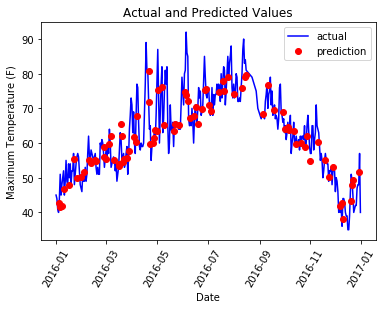

In [25]:
months = df[:, features_list.index('month')]
days = df[:, features_list.index('day')]
years = df[:, features_list.index('year')]

dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]


actual_data = pd.DataFrame(data = {'date': dates, 'actual': labels})

# Dates of predictions
months = X_TEST[:, features_list.index('month')]
days = X_TEST[:, features_list.index('day')]
years = X_TEST[:, features_list.index('year')]

test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]

test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]


predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predict})

plt.plot(actual_data['date'], actual_data['actual'], 'b-', label = 'actual')


plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()

plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');